0.7499825010999949


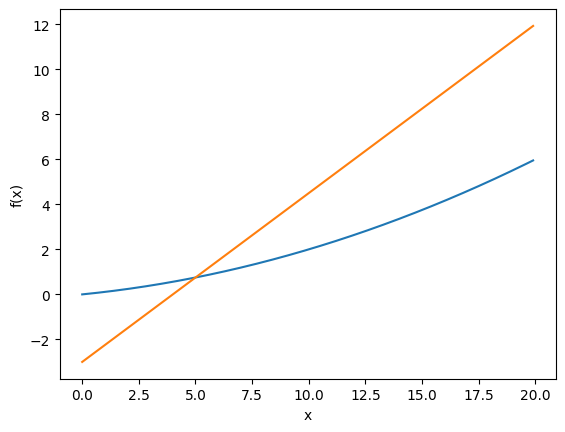

In [1]:
import sys, os

from mpl_toolkits.mplot3d import Axes3D

sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt


def numerical_diff(f, x):
    h = 1e-4
    return f(x + h) - f(x - h) / 2 * h


def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

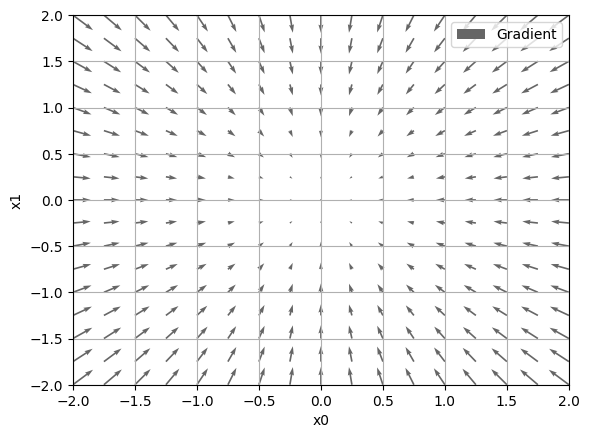

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp = x[idx]

        x[idx] = float(tmp) + h
        fxh1 = f(x)

        x[idx] = tmp - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)

    grad = np.zeros_like(X)
    for idx, x in enumerate(X):
        grad[idx] = _numerical_gradient_no_batch(f, x)
    return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x ** 2)
    else:
        # 행을 따라서 합하라 
        return np.sum(x ** 2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d * x
    return lambda t: d * t + y


# 벡터장 
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
Z = X ** 2 + Y ** 2

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666", label="Gradient")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.legend()
plt.draw()
plt.show()


<Figure size 640x480 with 0 Axes>

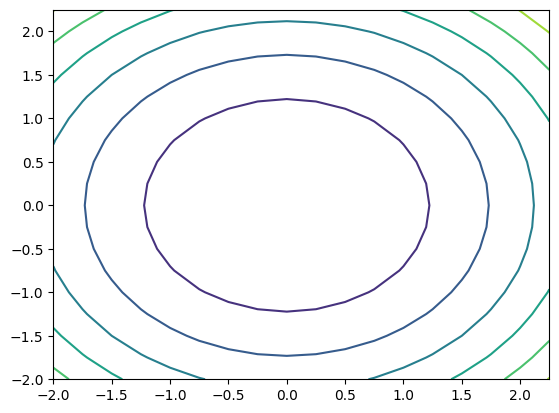

<Figure size 640x480 with 0 Axes>

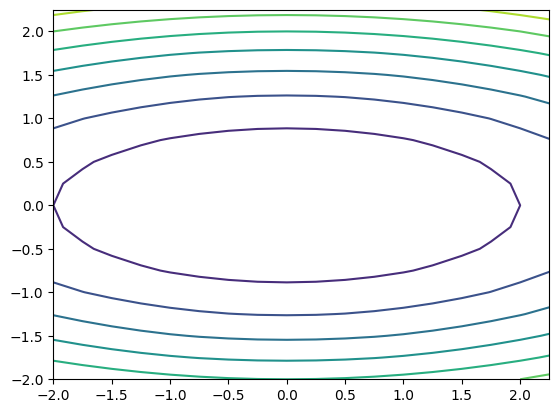

<Figure size 640x480 with 0 Axes>

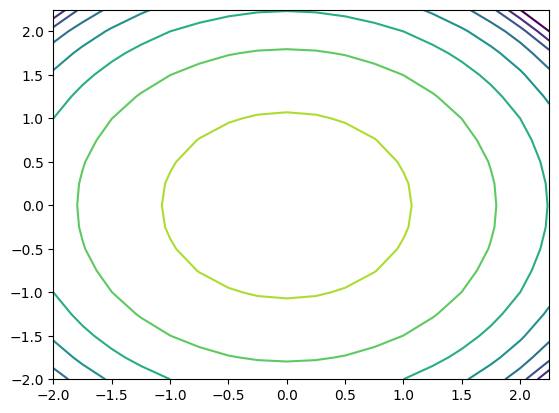

<Figure size 640x480 with 0 Axes>

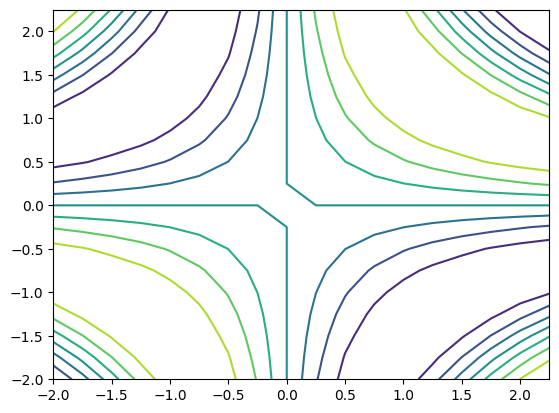

In [12]:

x = np.arange(-2, 2.5, 0.25)
y = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
Z = X ** 2 + Y ** 2


def draw3d(x, y, z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x, y, z)
    plt.show()
    plt.contour(x, y, z)
    plt.show()


draw3d(X, Y, Z)

Z = (1 / 5) * X ** 2 + Y ** 2
draw3d(X, Y, Z)

Z = np.maximum(0, 9 - X ** 2 - Y ** 2)
Z = np.sqrt(Z)
draw3d(X, Y, Z)

Z = np.sin(X * Y)
draw3d(X, Y, Z)



In [ ]:
from two_layer_net import TwoLayerNet

